# **Polynomial Linear Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/polynomial+regression.csv", sep=";")

In [ ]:
df

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


Dataya bakıldığında araba fiyatının artmasına rağmen hızının bir yerden sonra sabitlendiği görülür. Data linear olarak artan bir data değildir.

Araba fiyatına göre hızının tahmini yapılacağından veri görselleştirilirken fiyat sütunu x eksenine hız sütunu da y eksenine eşitlenir.

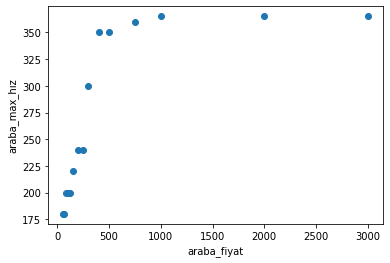

In [ ]:
x = df.araba_fiyat.values.reshape(-1,1)      #fiyat sütunundaki değerler alınarak 1 sütundan oluştuğu belirtilir.
y = df.araba_max_hiz.values.reshape(-1,1)    #hız sütunundaki değerler alınarak 1 sütundan oluştuğu belirtilir. 
                                             #values methodu serie'yi array'e çevirir.
plt.scatter(x,y)             
plt.xlabel("araba_fiyat")  
plt.ylabel("araba_max_hız")      
plt.show()                   

Eğer bu data linear regression modeline göre fit edilip model oluşturulursa oluşacak line aşağıdaki gibidir.

In [ ]:
lr = LinearRegression()  #LinearRegression modeli lr adlı variable'a eşitlenir.
lr.fit(x,y)              #x ve y değerlerine en uygun line fit edilir.

LinearRegression()

In [ ]:
y_head = lr.predict(x)   #arabanın fiyatına göre maximum hızı tahmin edilir.

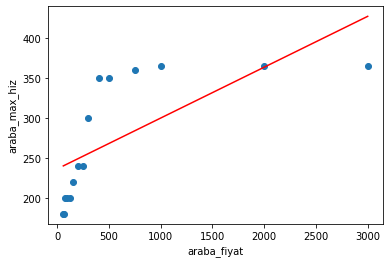

In [ ]:
plt.scatter(x,y)
plt.xlabel("araba_fiyat")
plt.ylabel("araba_max_hiz")

plt.plot(x,y_head,color="red",label ="linear")
plt.show()

Bu line linear regression modeline göre MSE değerinin minimum olduğu değerdir. Bu data linear regression modeline göre bu kadar fit edilebilir.

Prediction line'a bakıldığında noktaların çoğunun dışarıda kaldığı görülür. Çünkü bu veri linear olmadığından linear regression'a uygun değildir.

In [ ]:
lr.predict([[10000]]) #arabanın fiyatının 10,000,000 TL olduğunda max hızı linear regression'a göre tahmin edilir.

array([[871.66401826]])

Yapılan prediction'a göre arabanın fiyatı 10,000,000 TL olduğunda max hızı 871 km/h bulunmuştur. Bu da yaklaşık olarak bir uçağın hızına eşittir. Buradan da görüleceği üzere bu data linear regression'a uygun değildir.

Datasetteki değerler bir yerden sonra artışını durduğu için polynomial linear regression'a uygundur.

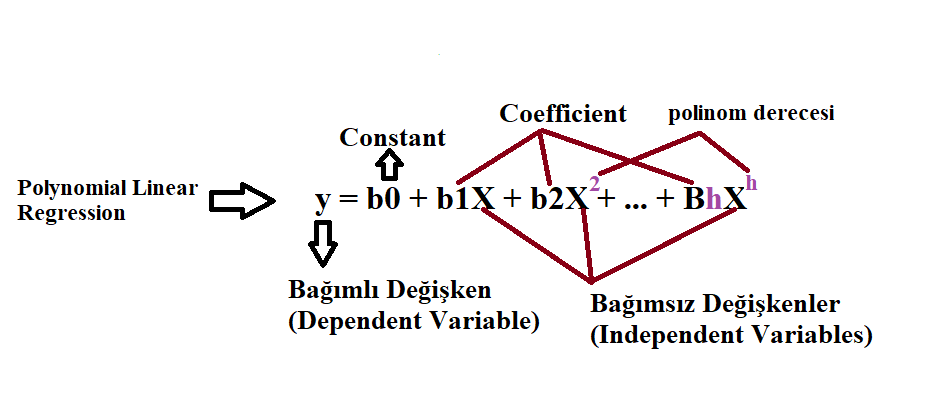

Formüldeki y değişkeni bağımlı değişken olarak adlandırılır. Veride bu hız değerleridir. 

X değişkenleri ise bağımsız değişkenlerdir. Verideki fiyat sütunudur.

Formüldeki h değeri polinomun derecesini belirler. Bu dereceye göre h=2'ye kuadratik, h=3'e kübik, h=4'e kuartik gibi adlandırmalar yapılabilir.

Polynomial regression'ın linear olmayan bir model ortaya çıkartıp isminde linear geçmesinin sebebi ise constant ve coefficient değerlerinin linear olmasıdır.

Linear ve multiple linear regressionda olduğu gibi Polynomial linear regression'da da amaç MSE değerini düşük tutmaktır. Bu da en uygun constant ve coefficient değerleri bulunarak yapılır.



Machine learning'de bir matematiksel model oluşturulur.

Predictionlar bu oluşturulan modele göre yapılır.

In [ ]:
polynomial_regression = PolynomialFeatures(degree = 2) #parabolik denklem -> y=bo+b1*x+b2*x^2

x_polynomial = polynomial_regression.fit_transform(x)  #x^2 feature'ı elde edilir.
#fit_transform methoduyla 2. dereceden parabolik denklem kullanılıp, x (araba_fiyat) polynomial feature'a çevrilir.

Oluşturulan x_polynomial feature'ı kullanarak line fit edilir.

In [ ]:
linear_regression2 = LinearRegression()  #LinearRegression modeli linear_regression2 variable'ına eşitlenir.
linear_regression2.fit(x_polynomial,y)   #x_polynomial feature'ı ve y değerleri kullanılarak line fit edilir.

LinearRegression()

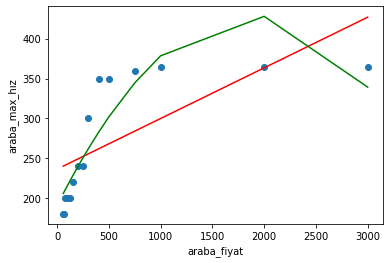

In [ ]:
y_head2 = linear_regression2.predict(x_polynomial) #oluşturulan modelle prediction yapılır.
#2. dereceden polynomial linear regression ve linear regression görselleştirilir.
plt.scatter(x,y)
plt.xlabel("araba_fiyat")
plt.ylabel("araba_max_hız")
plt.plot(x,y_head,color="red",label ="linear")
plt.plot(x,y_head2,color= "green",label = "poly")
plt.show()

In [ ]:
#4. dereceden polynomial linear regression modeli oluşturulur.
polynomial_regression = PolynomialFeatures(degree = 4)
x_polynomial = polynomial_regression.fit_transform(x)

linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

LinearRegression()

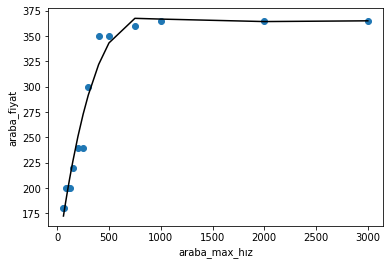

In [ ]:
y_head3 = linear_regression2.predict(x_polynomial)
plt.scatter(x,y)
plt.xlabel("araba_max_hız")
plt.ylabel("araba_fiyat")
plt.plot(x, y_head3, color="black", label="poly")
plt.show()

Degree'yi arttırarak model daha karmaşık bir hale getirildi. Böylelikle dataya neredeyse tam olarak uyarak, MSE'yi minimumda tutacak şekilde bir model oluşturulmuştur.